# plot mnist train nearest neighbor preserving property

In [1]:
# import modules
import os
import json

import numpy as np
import pandas as pd
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

d:\downloads\anaconda\envs\dr2\lib\site-packages\ipykernel_launcher.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import sys


In [2]:
dataset = "fmnist"
start = 10
end = 60
p = 10

In [3]:
data = np.array([])
# load data from evaluation.json
content_path = "E:\\DVI_exp_data\\resnet18_{}".format(dataset)
for epoch in range(start, end, p):
    eval_path = os.path.join(content_path, "Model", "Epoch_{}".format(epoch), "evaluation.json")
    with open(eval_path, "r") as f:
        eval = json.load(f)
    nn_train = round(eval["nn_train_15"], 3)
    nn_test = round(eval["nn_test_15"], 3)

    if len(data)==0:
        data = np.array([[dataset, "DVI", "Train", "{}".format(str(epoch//p)), nn_train]])
    else:
        data = np.concatenate((data, np.array([[dataset, "DVI", "Train", "{}".format(str(epoch//p)), nn_train]])), axis=0)
    data = np.concatenate((data, np.array([[dataset, "DVI", "Test", "{}".format(str(epoch//p)), nn_test]])), axis=0)

In [4]:
content_path = "E:\\xianglin\\git_space\\umap_exp\\results"
# pca
curr_path = os.path.join(content_path, "pca")
for epoch in range(start, end, p):
    eval_path = os.path.join(curr_path, "{}_{}".format(dataset, epoch), "exp_result.json")
    with open(eval_path, "r") as f:
        eval = json.load(f)
    nn_train = round(eval[1], 3)
    nn_test = round(eval[4], 3)

    data = np.concatenate((data, np.array([[dataset, "PCA", "Train", "{}".format(str(epoch//p)), nn_train]])), axis=0)
    data = np.concatenate((data, np.array([[dataset, "PCA", "Test", "{}".format(str(epoch//p)), nn_test]])), axis=0)
# tsne
curr_path = os.path.join(content_path, "tsne")
for epoch in range(start, end, p):
    eval_path = os.path.join(curr_path, "{}_{}".format(dataset, epoch), "exp_result.json")
    with open(eval_path, "r") as f:
        eval = json.load(f)
    nn_train = round(eval[1], 3)

    data = np.concatenate((data, np.array([[dataset, "TSNE", "Train", "{}".format(str(epoch//p)), nn_train]])), axis=0)

# umap
curr_path = os.path.join(content_path, "umap")
for epoch in range(start, end, p):
    eval_path = os.path.join(curr_path, "{}_{}".format(dataset, epoch), "exp_result.json")
    with open(eval_path, "r") as f:
        eval = json.load(f)
    nn_train = round(eval[1], 3)
    nn_test = round(eval[4], 3)

    data = np.concatenate((data, np.array([[dataset, "UMAP", "Train", "{}".format(str(epoch//p)), nn_train]])), axis=0)
    data = np.concatenate((data, np.array([[dataset, "UMAP", "Test", "{}".format(str(epoch//p)), nn_test]])), axis=0)

In [5]:
col = np.array(["dataset", "method", "type", "period", "eval"])
df = pd.DataFrame(data, columns=col)

In [6]:
df

,dataset,method,type,period,eval
0,fmnist,DVI,Train,1,1.859
1,fmnist,DVI,Test,1,1.766
2,fmnist,DVI,Train,2,2.161
3,fmnist,DVI,Test,2,2.055
4,fmnist,DVI,Train,3,2.559
5,fmnist,DVI,Test,3,2.443
6,fmnist,DVI,Train,4,2.165
7,fmnist,DVI,Test,4,2.078
8,fmnist,DVI,Train,5,2.099
9,fmnist,DVI,Test,5,2.012


In [7]:
df[["period"]] = df[["period"]].astype(int)
df[["eval"]] = df[["eval"]].astype(float)

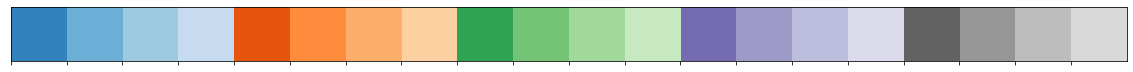

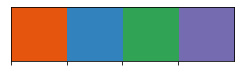

In [8]:
pal20c = sns.color_palette('tab20c', 20)
sns.palplot(pal20c)
hue_dict = {
    "DVI": pal20c[4],
    "UMAP": pal20c[0],
    "TSNE": pal20c[8],
    "PCA": pal20c[12],

}
sns.palplot([hue_dict[i] for i in hue_dict.keys()])

In [9]:
axes = {'labelsize': 14,
        'titlesize': 14,}
mpl.rc('axes', **axes)
mpl.rcParams['xtick.labelsize'] = 14

# hue_list = ["TSNE", "parametric-tsne", "umap-learn",  'direct', "network", "autoencoder", 'vae', 'ae_only', "PCA"]
hue_list = ["DVI", "UMAP", "TSNE", "PCA"]

Text(0.5, 0.98, 'fmnist')

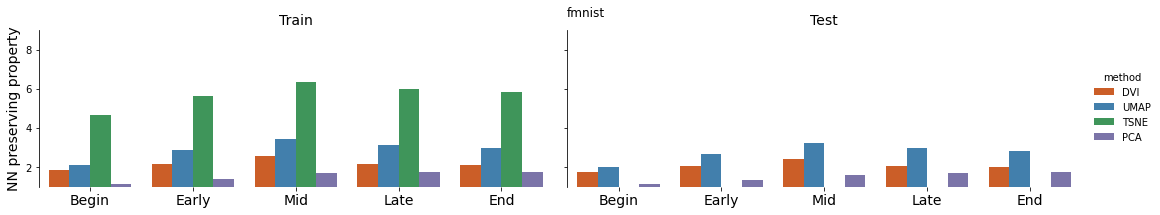

In [10]:
fg = sns.catplot(
    x="period",
    y="eval",
    hue="method",
    hue_order=hue_list,
    # order = [1, 2, 3, 4, 5],
    # row="method",
    col="type",
    ci=0.001,
    height=3, #2.65,
    aspect=2.5,#3,
    data=df,
    kind="bar",
    palette=[hue_dict[i] for i in hue_list],
    legend=True
)

axs = fg.axes[0]
max_ = df["eval"].max()
min_ = df["eval"].min()
axs[0].set_ylim(1.0, 9.0)
axs[0].set_title("Train")
axs[1].set_title("Test")

(fg.despine(bottom=True)
 .set_xticklabels(['Begin', 'Early', 'Mid', 'Late', 'End'])
 .set_axis_labels("", "NN preserving property")
 )
fg.fig.suptitle(dataset)

In [11]:
fg.savefig(
    "nn_{}.png".format(dataset),
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)